# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import Gradient Boosting Regressor and Classifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

# Import pickle
import pickle

np.random.seed(42)

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
path = 'data/'
pickle_path = 'pickle/'
results_path = 'results/'

convabuse_filename = 'convabuse_final.csv'
dghs_filename = 'dynamically_generated_hate_speech_dataset_final.csv'
oaa_filename = 'online_abusive_attacks_final.csv'
us2020hs_filename = 'us_elections_2020_hate_speech_final.csv'
mlma_hate_speech_filename = 'MLMA_hate_speech_final.csv'

In [3]:
# Import the datasets
convabuse = pd.read_csv(f'{path}{convabuse_filename}')
dynamically_generated_hate_speech = pd.read_csv(f'{path}{dghs_filename}')
online_abusive_attacks = pd.read_csv(f'{path}{oaa_filename}')
us_elections_2020_hate_speech = pd.read_csv(f'{path}{us2020hs_filename}')
mlma_hate_speech = pd.read_csv(f'{path}{mlma_hate_speech_filename}')
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

In [4]:
convabuse.head()

,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [6]:
dynamically_generated_hate_speech.head()

,label,type,annotator,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,0,16,0,0,0,0,0,0,0,0,1,1
1,1.0,-1,9,0,0,0,0,0,0,1,0,0,1
2,1.0,-1,16,1,0,0,0,0,0,0,0,0,1
3,1.0,0,2,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,17,1,0,0,0,0,0,0,0,0,1


In [7]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]

In [8]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [9]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [10]:
us_elections_2020_hate_speech.head()

,index,Trump,Biden,HOF
0,873,1.0,4.0,1
1,2947,0.0,3.0,1
2,2274,0.0,4.0,1
3,902,1.0,4.0,1
4,554,4.0,1.0,1


In [11]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]

In [12]:
mlma_hate_speech.head()

,HITId,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,hateful_sentiment,normal_sentiment,offensive_sentiment,disrespectful_sentiment,abusive_sentiment,fearful_sentiment,target_group
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
mlma_hate_speech_X = mlma_hate_speech.drop("target_group", axis=1)
mlma_hate_speech_y = mlma_hate_speech["target_group"]
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop("target_group", axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample["target_group"]

# Linear Modeling

In [14]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric_sample = mlma_hate_speech_X_sample.select_dtypes(include=np.number)

In [15]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [16]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [17]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [18]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [19]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [20]:
# Use standard scaler on the MLMA hate speech X sample data
mlma_hate_speech_sample_scaler = StandardScaler()
mlma_hate_speech_X_sample_scaled = mlma_hate_speech_sample_scaler.fit_transform(mlma_hate_speech_X_numeric_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_numeric_sample.columns)

In [21]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric.columns]:
  print(columns)

Index(['example_no', 'annotator_id', 'ableism', 'homophobic', 'intellectual',
       'racist', 'sexist', 'sex_harassment', 'transphobic', 'generalised',
       'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['type', 'annotator', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['index', 'Trump', 'Biden'], dtype='object')
Index(['HITId', 'directness', 'shock_annotator_sentiment',
       'anger_annotator_sentiment', 'confusion_annotator_sentiment',
       'sadness_annotator_sentiment', 'indifference_annotator_sentiment',
       'disgust_annotator_sentiment', 'fear_annotator_sentiment',
       'hateful_sentiment', 'normal_sentiment', 'offensive_sentiment',
       'disrespectful_sentiment', 'abusive_sentiment', 'fearful_

In [22]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.8, random_state=42)
us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [23]:
# Get the length of each dataset
convabuse_length = len(convabuse_X_train)
dghs_length = len(dghs_X_train)
online_abusive_attacks_length = len(online_abusive_attacks_X_train)
us2020hs_length = len(us2020hs_X_train)
mlma_hate_speech_length = len(mlma_hate_speech_X_train)
mlma_hate_speech_sample_length = len(mlma_hate_speech_X_train_sample)

In [24]:
convabuse_log2 = math.ceil(log2(convabuse_length))
convabuse_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_log2, convabuse_1_percent

(40272, 16, 403)

In [25]:
dghs_log2 = math.ceil(log2(dghs_length))
dghs_1_percent = math.ceil(dghs_length * 0.01)
dghs_length, dghs_log2, dghs_1_percent

(30350, 15, 304)

In [26]:
online_abusive_attacks_log2 = math.ceil(log2(online_abusive_attacks_length))
online_abusive_attacks_1_percent = math.ceil(online_abusive_attacks_length * 0.01)
online_abusive_attacks_length, online_abusive_attacks_log2, online_abusive_attacks_1_percent

(473, 9, 5)

In [27]:
us2020hs_log2 = math.ceil(log2(us2020hs_length))
us2020hs_1_percent = math.ceil(us2020hs_length * 0.01)
us2020hs_length, us2020hs_log2, us2020hs_1_percent

(4236, 13, 43)

In [28]:
mlma_hate_speech_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_log2, mlma_hate_speech_1_percent

(174874, 18, 1749)

In [29]:
mlma_hate_speech_sample_log2 = math.ceil(log2(mlma_hate_speech_sample_length))
mlma_hate_speech_sample_1_percent = math.ceil(mlma_hate_speech_sample_length * 0.01)
mlma_hate_speech_sample_length, mlma_hate_speech_sample_log2, mlma_hate_speech_sample_1_percent

(52462, 16, 525)

In [30]:
gb_regression_results_list = []

In [31]:
gb_classification_results_list = []

## Convabuse Decision Tree

In [32]:
convabuse_y_test.value_counts()

abuse_level
0    2067
2    2058
3    2000
1    1972
4    1971
Name: count, dtype: int64

In [33]:
convabuse_X_split_count = int((len(convabuse_X_train) / 10))
convabuse_X_split_count

4027

In [34]:
# Create a pipeline for the Gradient Boosting Classifier for the Convabuse dataset optimized for accuracy
convabuse_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid for GridSearchCV
convabuse_param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, convabuse_log2),
    'gb__min_samples_leaf': [convabuse_X_split_count]
}

# Create a GridSearchCV object
convabuse_gb_grid_search = GridSearchCV(
    convabuse_gb_pipeline, 
    convabuse_param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

In [35]:
# Fit the model
convabuse_gb_grid_search.fit(convabuse_X_train, convabuse_y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 16),
                         'gb__min_samples_leaf': [4027],
                         'gb__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [36]:
# Get the best parameters
convabuse_gb_best_params = convabuse_gb_grid_search.best_params_

# Get the best score
convabuse_gb_best_score = convabuse_gb_grid_search.best_score_

# Print
print("Best Parameters:", convabuse_gb_best_params)
print("Best Score:", convabuse_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.1), 'gb__max_depth': 5, 'gb__min_samples_leaf': 4027, 'gb__n_estimators': 200}
Best Score: 0.6024534362019743


In [37]:
# Pickle the model
with open(f'{pickle_path}convabuse_gb_model.pkl', 'wb') as f:
    pickle.dump(convabuse_gb_grid_search, f)

In [38]:
# Import the model
with open(f'{pickle_path}convabuse_gb_model.pkl', 'rb') as f:
    convabuse_gb_model = pickle.load(f)

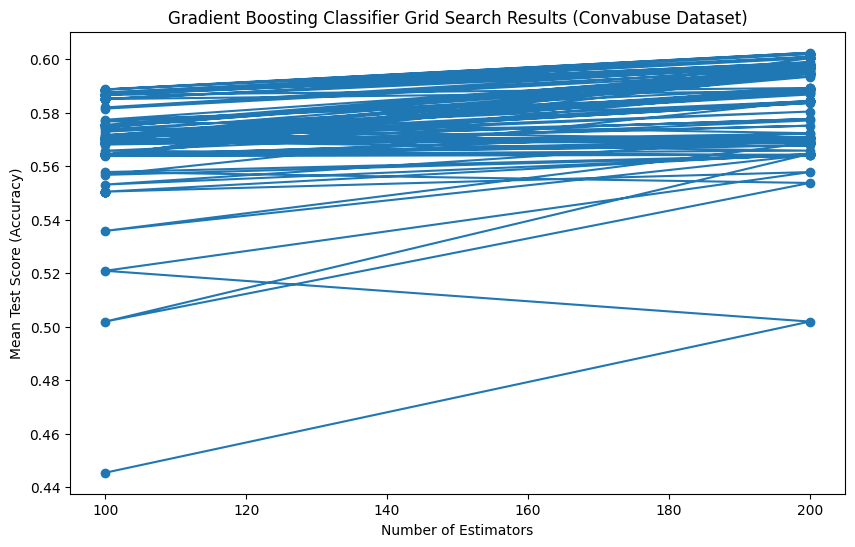

In [39]:
# Plot the grid search results for the Gradient Boosting Classifier on the Convabuse dataset
convabuse_gb_results_accuracy = pd.DataFrame(convabuse_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(convabuse_gb_results_accuracy['param_gb__n_estimators'], convabuse_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (Convabuse Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [40]:
# Use the best estimator to make predictions on the test set
convabuse_gb_best_estimator = convabuse_gb_grid_search.best_estimator_
convabuse_gb_y_pred = convabuse_gb_best_estimator.predict(convabuse_X_test)

In [41]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the Convabuse dataset
convabuse_gb_accuracy = accuracy_score(convabuse_y_test, convabuse_gb_y_pred)
convabuse_gb_f1 = f1_score(convabuse_y_test, convabuse_gb_y_pred, average='weighted')

# Print the results
print(f'Convabuse Gradient Boosting Classifier Accuracy: {convabuse_gb_accuracy}')
print(f'Convabuse Gradient Boosting Classifier F1 Score: {convabuse_gb_f1}')

Convabuse Gradient Boosting Classifier Accuracy: 0.6335915772745332
Convabuse Gradient Boosting Classifier F1 Score: 0.630505932481226


In [42]:
# Print the classification report for the Gradient Boosting Classifier on the Convabuse dataset
print("Classification Report for Convabuse Gradient Boosting Classifier:")
print(classification_report(convabuse_y_test, convabuse_gb_y_pred))

Classification Report for Convabuse Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      2067
           1       0.69      0.51      0.58      1972
           2       0.70      0.60      0.64      2058
           3       0.55      0.56      0.56      2000
           4       0.62      0.71      0.66      1971

    accuracy                           0.63     10068
   macro avg       0.64      0.63      0.63     10068
weighted avg       0.64      0.63      0.63     10068



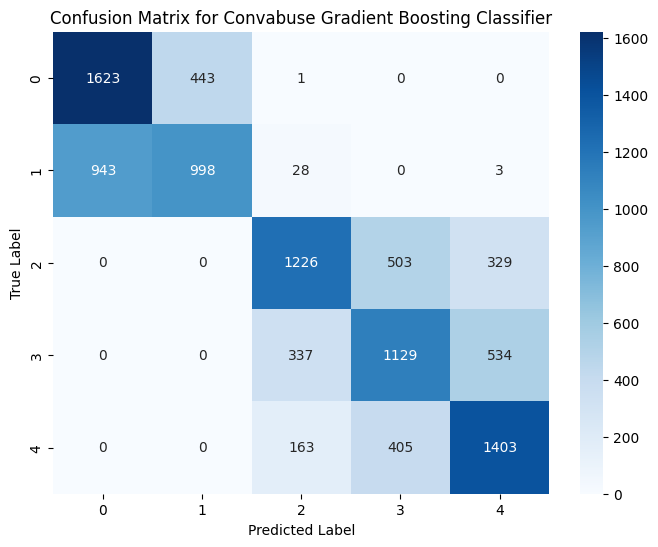

In [43]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the Convabuse dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(convabuse_y_test, convabuse_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Convabuse Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "Convabuse",
    "NA",
    "NA",
    convabuse_gb_accuracy,
    convabuse_gb_f1,
    0.0,
    convabuse_gb_grid_search.best_params_
))

In [45]:
dghs_X_split_count = int((len(dghs_X_train) / 10))
dghs_X_split_count

3035

In [46]:
# Create a pipeline for the Gradient Boosting Classifier for the Dynamically Generated Hate Speech dataset optimized for accuracy
dghs_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid for GridSearchCV
dghs_param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, dghs_log2),
    'gb__min_samples_leaf': [dghs_X_split_count]
}

# Create a GridSearchCV object
dghs_gb_grid_search = GridSearchCV(
    estimator=dghs_gb_pipeline,
    param_grid=dghs_param_grid,
    scoring='accuracy',
    cv=5
)

In [47]:
# Fit the model
dghs_gb_grid_search.fit(dghs_X_train, dghs_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 15),
                         'gb__min_samples_leaf': [3035],
                         'gb__n_estimators': [100, 200]},
             scoring='accuracy')

In [48]:
# Get the best parameters
dghs_gb_best_params = dghs_gb_grid_search.best_params_

# Get the best score
dghs_gb_best_score = dghs_gb_grid_search.best_score_

# Print
print("Best Parameters:", dghs_gb_best_params)
print("Best Score:", dghs_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.1), 'gb__max_depth': 3, 'gb__min_samples_leaf': 3035, 'gb__n_estimators': 100}
Best Score: 0.8490280065897858


In [49]:
# Pickle the model
with open(f'{pickle_path}dghs_gb_model.pkl', 'wb') as f:
    pickle.dump(dghs_gb_grid_search, f)

In [50]:
# Import the model
with open(f'{pickle_path}dghs_gb_model.pkl', 'rb') as f:
    dghs_gb_model = pickle.load(f)

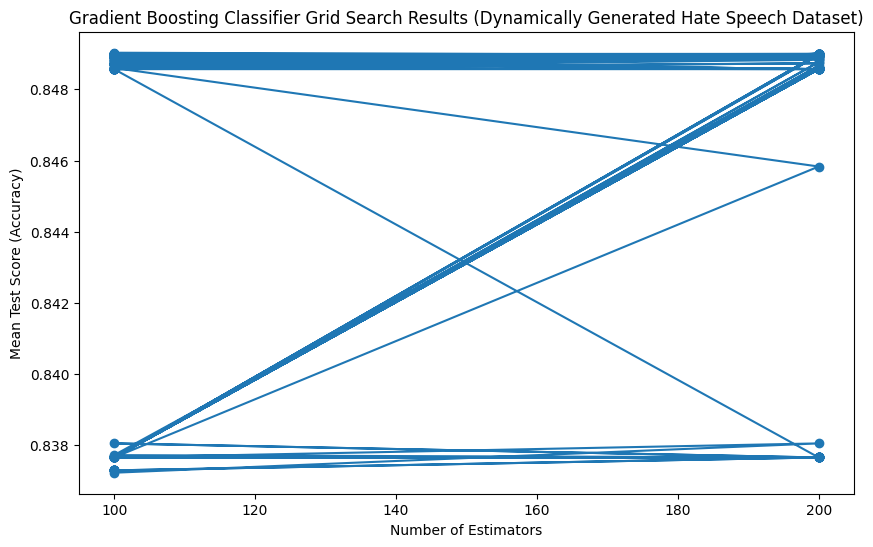

In [51]:
# Plot the grid search results for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
dghs_gb_results_accuracy = pd.DataFrame(dghs_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(dghs_gb_results_accuracy['param_gb__n_estimators'], dghs_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (Dynamically Generated Hate Speech Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [52]:
# Use the best estimator to make predictions on the test set
dghs_gb_best_estimator = dghs_gb_grid_search.best_estimator_
dghs_gb_y_pred = dghs_gb_best_estimator.predict(dghs_X_test)

In [53]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
dghs_gb_accuracy = accuracy_score(dghs_y_test, dghs_gb_y_pred)
dghs_gb_f1 = f1_score(dghs_y_test, dghs_gb_y_pred, average='weighted')

In [54]:
# Print the results
print(f'Dynamically Generated Hate Speech Gradient Boosting Classifier Accuracy: {dghs_gb_accuracy}')
print(f'Dynamically Generated Hate Speech Gradient Boosting Classifier F1 Score: {dghs_gb_f1}')

Dynamically Generated Hate Speech Gradient Boosting Classifier Accuracy: 0.8488402741170269
Dynamically Generated Hate Speech Gradient Boosting Classifier F1 Score: 0.8476276280076024


In [55]:
# Print the classification report for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
print("Classification Report for Dynamically Generated Hate Speech Gradient Boosting Classifier:")
print(classification_report(dghs_y_test, dghs_gb_y_pred))

Classification Report for Dynamically Generated Hate Speech Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      3788
         1.0       0.93      0.76      0.83      3800

    accuracy                           0.85      7588
   macro avg       0.86      0.85      0.85      7588
weighted avg       0.86      0.85      0.85      7588



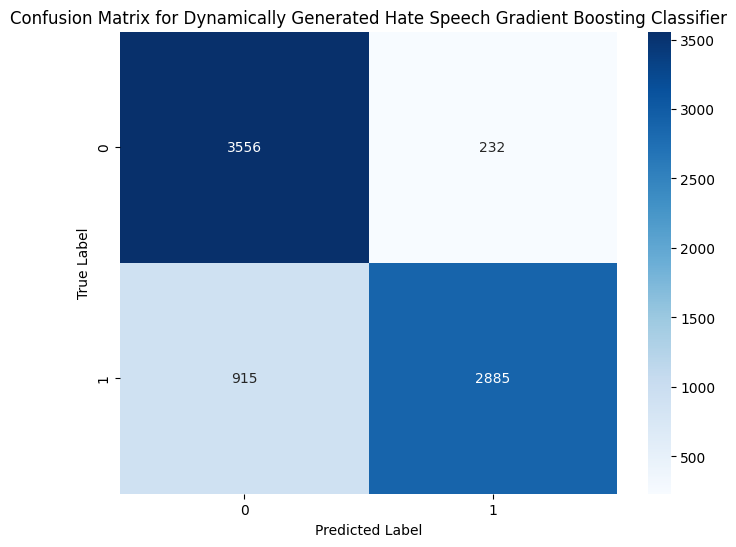

In [56]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the Dynamically Generated Hate Speech dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(dghs_y_test, dghs_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Dynamically Generated Hate Speech Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [57]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "Dynamically Generated Hate Speech",
    "NA",
    "NA",
    dghs_gb_accuracy,
    dghs_gb_f1,
    0.0,
    dghs_gb_grid_search.best_params_
))

In [60]:
oaa_X_split_count = int((len(dghs_X_train) / 10))
oaa_X_split_count

3035

In [61]:
# Create a pipeline for the Gradient Boosting Regressor for the Online Abusive Attacks dataset optimized for accuracy
oaa_gb_pipeline = Pipeline([
    ('gb', GradientBoostingRegressor())
])

# Define the parameter grid for GridSearchCV
oaa_param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, online_abusive_attacks_log2),
    'gb__min_samples_leaf': [oaa_X_split_count]
}

# Create a GridSearchCV object
oaa_gb_grid_search = GridSearchCV(
    estimator=oaa_gb_pipeline,
    param_grid=oaa_param_grid,
    scoring='r2',
    cv=5
)

In [62]:
# Fit the model
oaa_gb_grid_search.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingRegressor())]),
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 9),
                         'gb__min_samples_leaf': [3035],
                         'gb__n_estimators': [100, 200]},
             scoring='r2')

In [63]:
# Get the best parameters
oaa_gb_best_params = oaa_gb_grid_search.best_params_

# Get the best score
oaa_gb_best_score = oaa_gb_grid_search.best_score_

# Print
print("Best Parameters:", oaa_gb_best_params)
print("Best Score:", oaa_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.09000000000000001), 'gb__max_depth': 1, 'gb__min_samples_leaf': 3035, 'gb__n_estimators': 100}
Best Score: -0.7399736794745425


In [64]:
# Pickle the model
with open(f'{pickle_path}oaa_gb_model.pkl', 'wb') as f:
    pickle.dump(oaa_gb_grid_search, f)

In [65]:
# Import the model
with open(f'{pickle_path}oaa_gb_model.pkl', 'rb') as f:
    oaa_gb_grid_search = pickle.load(f)

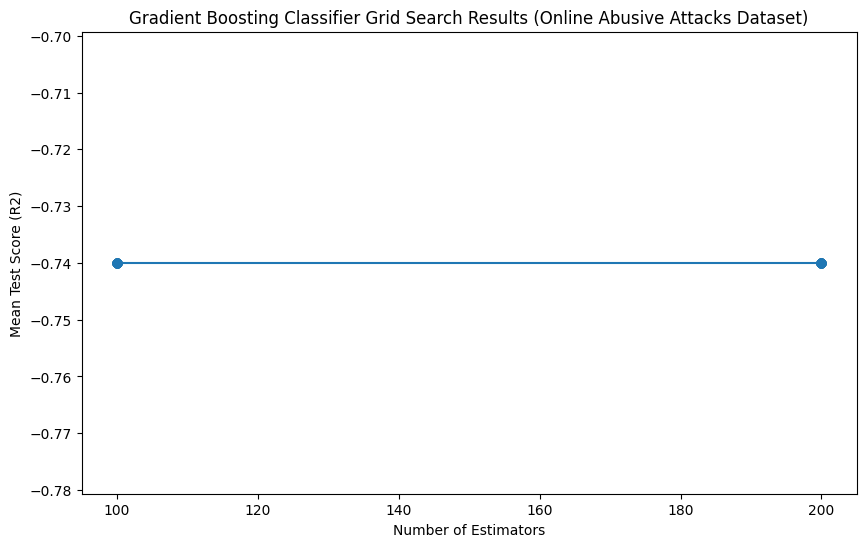

In [66]:
# Plot the grid search results for the Gradient Boosting Classifier on the Online Abusive Attacks dataset
oaa_gb_results_r2 = pd.DataFrame(oaa_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(oaa_gb_results_r2['param_gb__n_estimators'], oaa_gb_results_r2['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (Online Abusive Attacks Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (R2)')
plt.show()

In [67]:
# Use the best estimator to make predictions on the test set
oaa_gb_best_estimator = oaa_gb_grid_search.best_estimator_
oaa_gb_y_pred = oaa_gb_best_estimator.predict(online_abusive_attacks_X_test)

In [70]:
# Calculate the RMSE and R2 score for the Gradient Boosting Classifier on the Online Abusive Attacks dataset
oaa_gb_rmse = root_mean_squared_error(online_abusive_attacks_y_test, oaa_gb_y_pred)
oaa_gb_r2 = r2_score(online_abusive_attacks_y_test, oaa_gb_y_pred)

# Print the results
print(f'Online Abusive Attacks Gradient Boosting Classifier RMSE: {oaa_gb_rmse}')
print(f'Online Abusive Attacks Gradient Boosting Classifier R2 Score: {oaa_gb_r2}')

Online Abusive Attacks Gradient Boosting Classifier RMSE: 8.872757878395225
Online Abusive Attacks Gradient Boosting Classifier R2 Score: -0.0007287074962485374


In [71]:
# Append details to the results list
gb_regression_results_list.append((
    "Gradient Boosting", 
    "Online Abusive Attacks", 
    oaa_gb_rmse,
    oaa_gb_r2, 
    oaa_gb_grid_search.best_params_
))

In [72]:
us2020hs_X_split_count = int((len(us2020hs_X_train) / 10))
us2020hs_X_split_count

423

In [73]:
# Create a pipeline for the Gradient Boosting Classifier for the US Elections 2020 Hate Speech dataset optimized for accuracy
us2020hs_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])


In [74]:
# Define the parameter grid for GridSearchCV
us2020hs_param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, us2020hs_log2),
    'gb__min_samples_leaf': [us2020hs_X_split_count]
}

In [75]:
# Create a GridSearchCV object
us2020hs_gb_grid_search = GridSearchCV(
    estimator=us2020hs_gb_pipeline,
    param_grid=us2020hs_param_grid,
    scoring='accuracy',
    cv=5, 
    n_jobs=-1,
    verbose=1
)


In [77]:
# Fit the model
us2020hs_gb_grid_search.fit(us2020hs_X_train, us2020hs_y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 13),
                         'gb__min_samples_leaf': [423],
                         'gb__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [78]:
# Get the best parameters
us2020hs_gb_best_params = us2020hs_gb_grid_search.best_params_

# Get the best score
us2020hs_gb_best_score = us2020hs_gb_grid_search.best_score_

# Print
print("Best Parameters:", us2020hs_gb_best_params)
print("Best Score:", us2020hs_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.1), 'gb__max_depth': 6, 'gb__min_samples_leaf': 423, 'gb__n_estimators': 200}
Best Score: 0.6949973268583903


In [79]:
# Pickle the model
with open(f'{pickle_path}us2020hs_gb_model.pkl', 'wb') as f:
    pickle.dump(us2020hs_gb_grid_search, f)

In [80]:
# Import the model
with open(f'{pickle_path}us2020hs_gb_model.pkl', 'rb') as f:
    us2020hs_gb_model = pickle.load(f)

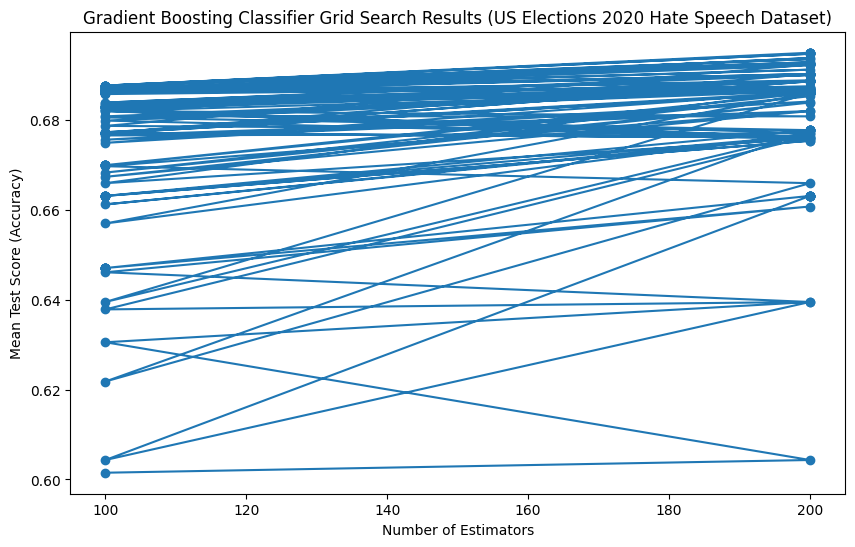

In [81]:
# Plot the grid search results for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
us2020hs_gb_results_accuracy = pd.DataFrame(us2020hs_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_gb_results_accuracy['param_gb__n_estimators'], us2020hs_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (US Elections 2020 Hate Speech Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [82]:
# Use the best estimator to make predictions on the test set
us2020hs_gb_best_estimator = us2020hs_gb_grid_search.best_estimator_
us2020hs_gb_y_pred = us2020hs_gb_best_estimator.predict(us2020hs_X_test)

In [83]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
us2020hs_gb_accuracy = accuracy_score(us2020hs_y_test, us2020hs_gb_y_pred)
us2020hs_gb_f1 = f1_score(us2020hs_y_test, us2020hs_gb_y_pred, average='weighted')

# Print the results
print(f'US Elections 2020 Hate Speech Gradient Boosting Classifier Accuracy: {us2020hs_gb_accuracy}')
print(f'US Elections 2020 Hate Speech Gradient Boosting Classifier F1 Score: {us2020hs_gb_f1}')

US Elections 2020 Hate Speech Gradient Boosting Classifier Accuracy: 0.7188679245283018
US Elections 2020 Hate Speech Gradient Boosting Classifier F1 Score: 0.7188338613926228


In [84]:
# Print the classification report for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
print("Classification Report for US Elections 2020 Hate Speech Gradient Boosting Classifier:")
print(classification_report(us2020hs_y_test, us2020hs_gb_y_pred))

Classification Report for US Elections 2020 Hate Speech Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       515
           1       0.72      0.73      0.73       545

    accuracy                           0.72      1060
   macro avg       0.72      0.72      0.72      1060
weighted avg       0.72      0.72      0.72      1060



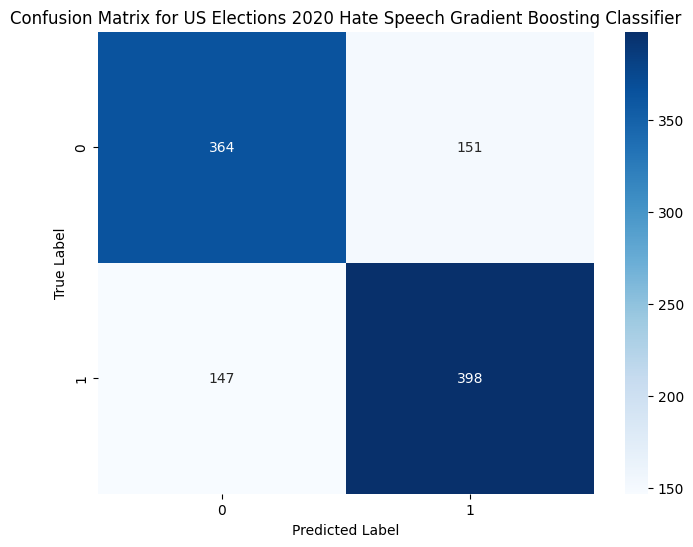

In [85]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the US Elections 2020 Hate Speech dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(us2020hs_y_test, us2020hs_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for US Elections 2020 Hate Speech Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [86]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "US Elections 2020 Hate Speech",
    "NA",
    "NA",
    us2020hs_gb_accuracy,
    us2020hs_gb_f1,
    0.0,
    us2020hs_gb_grid_search.best_params_
))

In [90]:
mlma_hate_speech_X_sample_split_count = int((len(mlma_hate_speech_X_train_sample) / 10))
mlma_hate_speech_X_sample_split_count

5246

In [94]:
# Create a pipeline for the Gradient Boosting Classifier for the MLMA Hate Speech dataset optimized for accuracy
mlma_hate_speech_gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid for GridSearchCV
mlma_hate_speech_param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': np.linspace(0.01, 0.1, 10),
    'gb__max_depth': range(1, mlma_hate_speech_log2),
    'gb__min_samples_leaf': [mlma_hate_speech_X_split_count]
}

# Create a GridSearchCV object
mlma_hate_speech_gb_grid_search = GridSearchCV(
    estimator=mlma_hate_speech_gb_pipeline,
    param_grid=mlma_hate_speech_param_grid,
    scoring='accuracy',
    cv=2,
    n_jobs=-1,
    verbose=1
)

In [95]:
# Fit the model
mlma_hate_speech_gb_grid_search.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)

Fitting 2 folds for each of 340 candidates, totalling 680 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'gb__max_depth': range(1, 18),
                         'gb__min_samples_leaf': [17487],
                         'gb__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [96]:
# Get the best parameters
mlma_hate_speech_gb_best_params = mlma_hate_speech_gb_grid_search.best_params_

# Get the best score
mlma_hate_speech_gb_best_score = mlma_hate_speech_gb_grid_search.best_score_

# Print
print("Best Parameters:", mlma_hate_speech_gb_best_params)
print("Best Score:", mlma_hate_speech_gb_best_score)

Best Parameters: {'gb__learning_rate': np.float64(0.01), 'gb__max_depth': 1, 'gb__min_samples_leaf': 17487, 'gb__n_estimators': 100}
Best Score: 0.013743280850901604


In [97]:
# Pickle the model
with open(f'{pickle_path}mlma_hate_speech_gb_model.pkl', 'wb') as f:
    pickle.dump(mlma_hate_speech_gb_grid_search, f)

In [98]:
# Import the model
with open(f'{pickle_path}mlma_hate_speech_gb_model.pkl', 'rb') as f:
    mlma_hate_speech_gb_model = pickle.load(f)

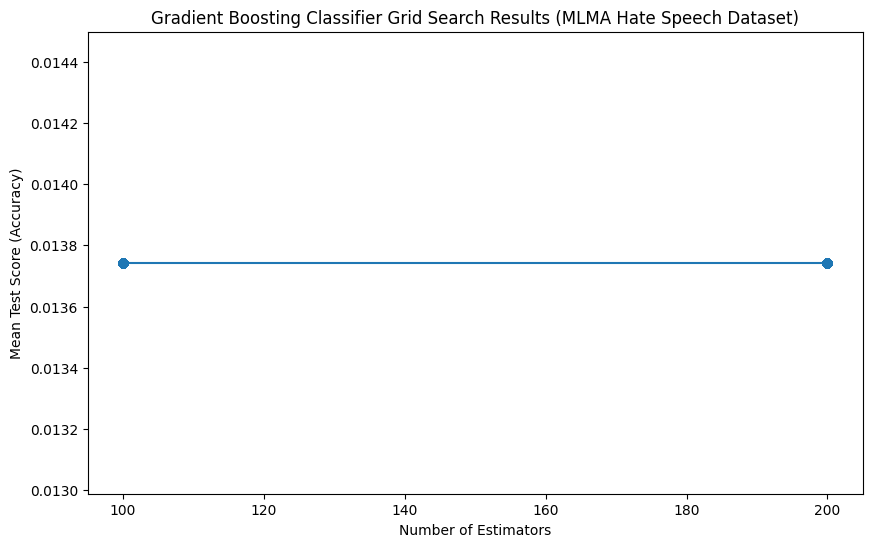

In [99]:
# Plot the grid search results for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
mlma_hate_speech_gb_results_accuracy = pd.DataFrame(mlma_hate_speech_gb_grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_gb_results_accuracy['param_gb__n_estimators'], mlma_hate_speech_gb_results_accuracy['mean_test_score'], marker='o')
plt.title('Gradient Boosting Classifier Grid Search Results (MLMA Hate Speech Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.show()

In [100]:
# Use the best estimator to make predictions on the test set
mlma_hate_speech_gb_best_estimator = mlma_hate_speech_gb_grid_search.best_estimator_
mlma_hate_speech_gb_y_pred = mlma_hate_speech_gb_best_estimator.predict(mlma_hate_speech_X_test)

In [101]:
# Calculate the accuracy and f1-score for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
mlma_hate_speech_gb_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred)
mlma_hate_speech_gb_f1 = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred, average='weighted')

# Print the results
print(f'MLMA Hate Speech Gradient Boosting Classifier Accuracy: {mlma_hate_speech_gb_accuracy}')
print(f'MLMA Hate Speech Gradient Boosting Classifier F1 Score: {mlma_hate_speech_gb_f1}')

MLMA Hate Speech Gradient Boosting Classifier Accuracy: 0.3451359820672934
MLMA Hate Speech Gradient Boosting Classifier F1 Score: 0.31944154428978194


In [102]:
# Print the classification report for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
print("Classification Report for MLMA Hate Speech Gradient Boosting Classifier:")
print(classification_report(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred))

Classification Report for MLMA Hate Speech Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       585
           1       0.00      0.00      0.00       495
           2       0.00      0.00      0.00       546
           3       0.00      0.00      0.00       570
           4       0.00      0.00      0.00       546
           5       0.00      0.00      0.00       543
           6       0.00      0.00      0.00       530
           7       0.00      0.00      0.00       518
           8       0.00      0.00      0.00       566
           9       0.00      0.00      0.00       533
          10       0.00      0.00      0.00       600
          11       0.04      1.00      0.08       599
          12       0.00      0.00      0.00       545
          13       0.00      0.00      0.00       545
          14       0.00      0.00      0.00       557
          15       0.00      0.00      0.00       559
        

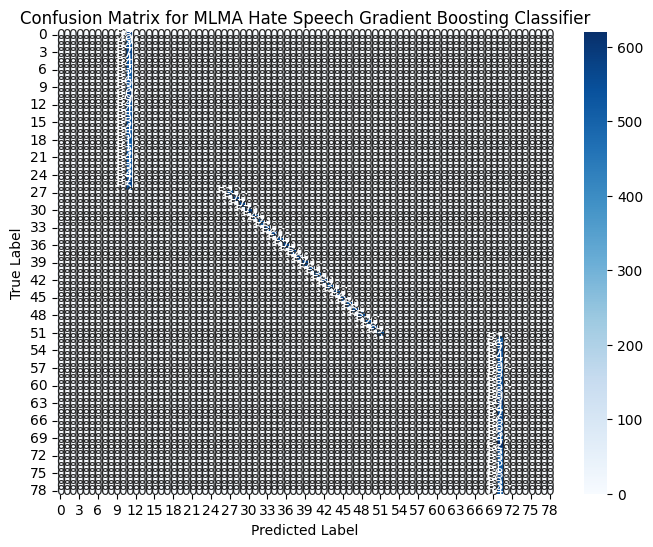

In [103]:
# Plot the confusion matrix for the Gradient Boosting Classifier on the MLMA Hate Speech dataset
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(mlma_hate_speech_y_test, mlma_hate_speech_gb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLMA Hate Speech Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [104]:
# Append details to the results list
gb_classification_results_list.append((
    "Gradient Boosting",
    "MLMA Hate Speech",
    "NA",
    "NA",
    mlma_hate_speech_gb_accuracy,
    mlma_hate_speech_gb_f1,
    0.0,
    mlma_hate_speech_gb_grid_search.best_params_
))

## Support Vector Machine Conclusions

In [105]:
gb_regression_results_list

[('Gradient Boosting',
  'Online Abusive Attacks',
  8.872757878395225,
  -0.0007287074962485374,
  {'gb__learning_rate': np.float64(0.09000000000000001),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 3035,
   'gb__n_estimators': 100})]

In [106]:
gb_classification_results_list

[('Gradient Boosting',
  'Convabuse',
  'NA',
  'NA',
  0.6335915772745332,
  0.630505932481226,
  0.0,
  {'gb__learning_rate': np.float64(0.1),
   'gb__max_depth': 5,
   'gb__min_samples_leaf': 4027,
   'gb__n_estimators': 200}),
 ('Gradient Boosting',
  'Dynamically Generated Hate Speech',
  'NA',
  'NA',
  0.8488402741170269,
  0.8476276280076024,
  0.0,
  {'gb__learning_rate': np.float64(0.1),
   'gb__max_depth': 3,
   'gb__min_samples_leaf': 3035,
   'gb__n_estimators': 100}),
 ('Gradient Boosting',
  'US Elections 2020 Hate Speech',
  'NA',
  'NA',
  0.7188679245283018,
  0.7188338613926228,
  0.0,
  {'gb__learning_rate': np.float64(0.1),
   'gb__max_depth': 6,
   'gb__min_samples_leaf': 423,
   'gb__n_estimators': 200}),
 ('Gradient Boosting',
  'MLMA Hate Speech',
  'NA',
  'NA',
  0.3451359820672934,
  0.31944154428978194,
  0.0,
  {'gb__learning_rate': np.float64(0.01),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 17487,
   'gb__n_estimators': 100})]

In [107]:
# Convert the gb_classification_results_list to a DataFrame
gb_classification_summary = pd.DataFrame(gb_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
gb_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Gradient Boosting,Convabuse,NA,NA,0.633592,0.630506,0.0,"{'gb__learning_rate': 0.1, 'gb__max_depth': 5,..."
1,Gradient Boosting,Dynamically Generated Hate Speech,NA,NA,0.848840,0.847628,0.0,"{'gb__learning_rate': 0.1, 'gb__max_depth': 3,..."
2,Gradient Boosting,US Elections 2020 Hate Speech,NA,NA,0.718868,0.718834,0.0,"{'gb__learning_rate': 0.1, 'gb__max_depth': 6,..."
3,Gradient Boosting,MLMA Hate Speech,NA,NA,0.345136,0.319442,0.0,"{'gb__learning_rate': 0.01, 'gb__max_depth': 1..."


In [108]:
gb_regression_results_list

[('Gradient Boosting',
  'Online Abusive Attacks',
  8.872757878395225,
  -0.0007287074962485374,
  {'gb__learning_rate': np.float64(0.09000000000000001),
   'gb__max_depth': 1,
   'gb__min_samples_leaf': 3035,
   'gb__n_estimators': 100})]

In [109]:
# Convert the gb_regression_results_list to a DataFrame
gb_regression_summary = pd.DataFrame(gb_regression_results_list, columns=["Model", "Dataset", "RMSE", "R2", "Best Parameters"])
gb_regression_summary

,Model,Dataset,RMSE,R2,Best Parameters
0,Gradient Boosting,Online Abusive Attacks,8.872758,-0.000729,"{'gb__learning_rate': 0.09000000000000001, 'gb..."


In [110]:
gb_classification_summary.to_csv(f"{results_path}/model9_gb-classification-summary.csv", index=False)
gb_regression_summary.to_csv(f"{results_path}/model9_gb-regression-summary.csv", index=False)